In [ ]:
##import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [88]:
##生成数据
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [268]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

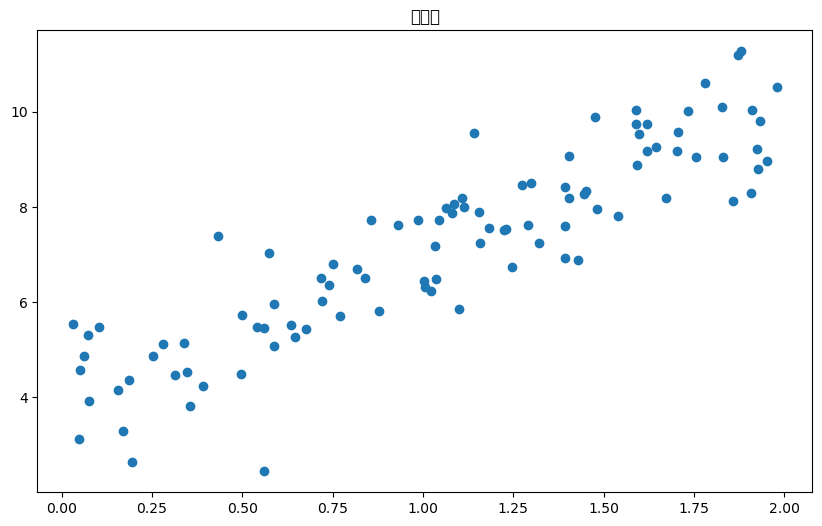

In [78]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('数据集')
plt.show()

In [79]:
model=LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [80]:
y_pred=model.predict(X)

In [81]:
print(f"斜率(权重): {model.coef_[0][0]:.3f}")
print(f"截距(偏置): {model.intercept_[0]:.3f}")
print(f"均方误差(MSE): {mean_squared_error(y, y_pred):.3f}")

斜率(权重): 3.139
截距(偏置): 3.865
均方误差(MSE): 0.795


In [82]:
slope=model.coef_[0][0]
intercept=model.intercept_[0]
MSE=mean_squared_error(y, y_pred)

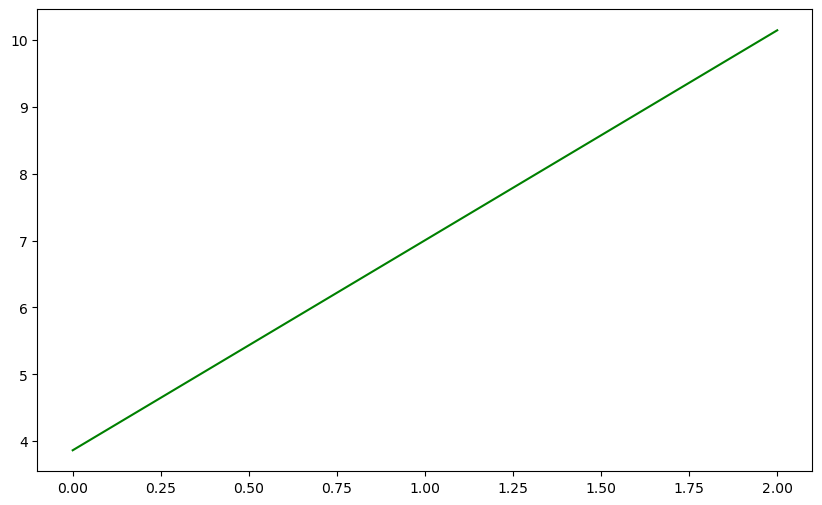

In [85]:
x=np.linspace(0,2,100)
y_trained=slope*x+intercept
plt.figure(figsize=(10,6))
plt.plot(x,y_trained,color='green')

plt.show()

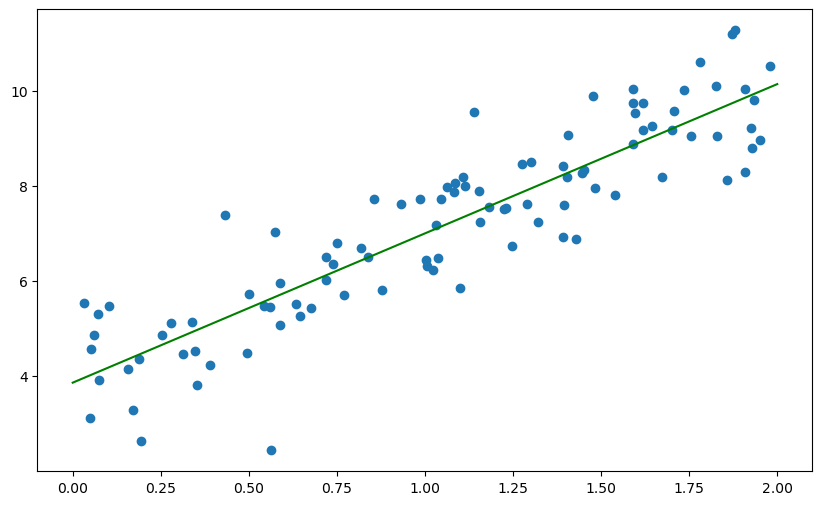

In [84]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(x,y_trained,color='green')
plt.show()

In [108]:
##计算代价函数
def compute_cost(X,y,theta):
    m=len(y)
    predictions=X.dot(theta)
    errors=predictions-y
    cost=(1/(2*m)) * np.sum(np.square(errors))
    return cost


In [118]:
def gradient_descent(X,y,theta,alpha,iterations):
    m=len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions=X.dot(theta)
        errors=predictions-y
        gradient=(1/m) * X.T.dot(errors)
        theta=theta-gradient*alpha
        cost_history[i]=compute_cost(X,y,theta)
    return theta, cost_history

In [119]:
##加入一列1
X_b = np.c_[np.ones((len(X), 1)), X]
##初始化theta
theta_initial=np.random.randn(2,1)
print(theta_initial[0][0],theta_initial[1][0])

0.22409248181041677 0.01259240078179486


In [124]:
##初始化学习率和迭代次数
alpha=0.1
iterations=100

In [125]:
theta_final,cost_history=gradient_descent(X_b,y,theta_initial,alpha,iterations)

[[0.38289613]
 [1.89394391]]
[15.65639384  9.4596232   5.78667056  3.60943023  2.31861278  1.55313299
  1.09899957  0.82939387  0.66915867  0.57375294  0.51677986  0.48259546
  0.46192825  0.44928332  0.44140387  0.43635952  0.43300593  0.43066463
  0.42893326  0.42757308  0.42644232  0.42545671  0.42456603  0.42374029
  0.42296145  0.4222186   0.42150502  0.42081652  0.4201504   0.41950484
  0.41887855  0.41827058  0.41768015  0.41710663  0.41654946  0.41600812
  0.41548213  0.41497103  0.41447441  0.41399184  0.41352292  0.41306726
  0.41262448  0.41219423  0.41177615  0.41136989  0.41097512  0.41059151
  0.41021874  0.40985652  0.40950454  0.40916252  0.40883016  0.4085072
  0.40819338  0.40788843  0.4075921   0.40730415  0.40702435  0.40675245
  0.40648825  0.40623151  0.40598204  0.40573962  0.40550405  0.40527515
  0.40505271  0.40483657  0.40462654  0.40442245  0.40422413  0.40403142
  0.40384415  0.40366219  0.40348536  0.40331354  0.40314658  0.40298433
  0.40282668  0.4026734

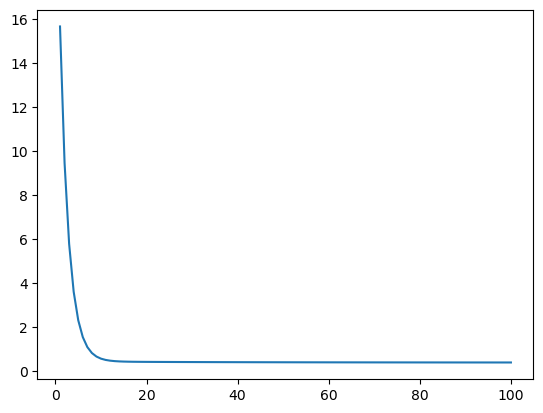

In [269]:
print(theta_final)
print(cost_history)
plt.plot(list(range(1,101)), cost_history)
